# Detect and handle outliers

###### Why to handle outliers?

In [2]:
import pandas as pd

data = [[10,  20], [20, 30], [30, 40], [40, 50], [50, 60], [60, 70]]

df = pd.DataFrame(data, columns=['Input', 'Output'])

In [3]:
df.head()

,Input,Output
0,10,20
1,20,30
2,30,40
3,40,50
4,50,60


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
x = df['Input']
y = df['Output']

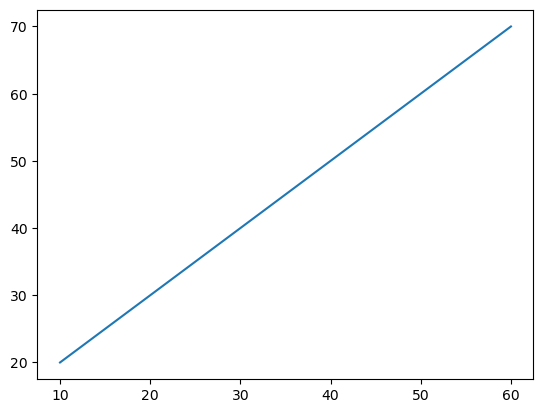

In [14]:
# plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)
plt.show()



In [15]:
#  introduce an outliers

data = [[10,  20], [20, 30], [30, 40], [40, 50], [50, 60], [60, -20]]

df = pd.DataFrame(data, columns=['Input', 'Output'])




In [16]:
x = df['Input']
y = df['Output']

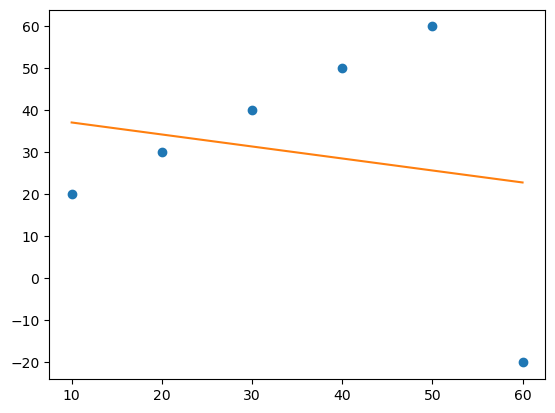

In [18]:
plt.plot(x, y, 'o')

m, b = np.polyfit(x, y, 1)

plt.plot(x, m*x+b)
plt.show()


###### Visualize outliers / detect outliers

In [19]:
data = pd.read_csv('house.csv')

data.head()

,number_of_rooms,floor,area,latitude,longitude,price
0,1,1,58.0,38.585834,68.793715,330000
1,1,14,68.0,38.522254,68.749918,340000
2,3,8,50.0,NaN,NaN,700000
3,3,14,84.0,38.520835,68.747908,700000
4,3,3,83.0,38.564374,68.739419,415000


In [20]:
data.dropna(inplace=True)

In [21]:
import seaborn as sns

<AxesSubplot:>

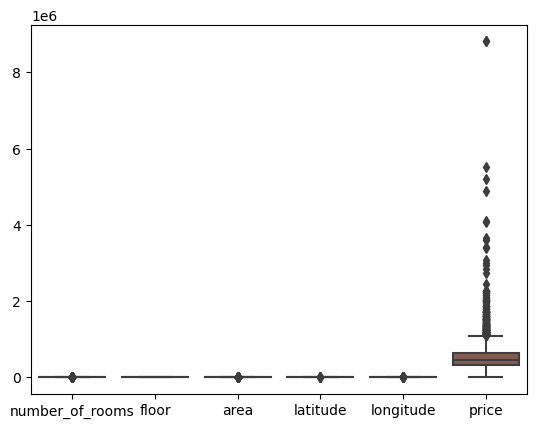

In [22]:
sns.boxplot(data)

<AxesSubplot:>

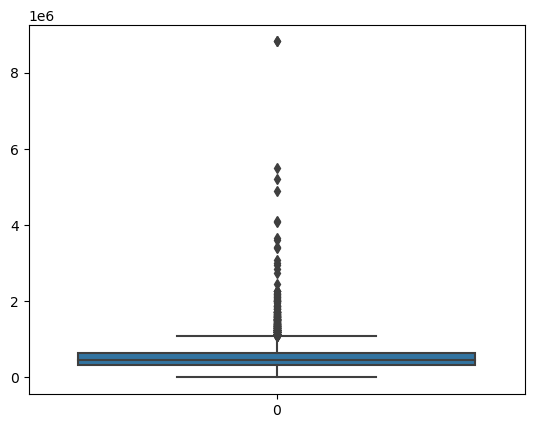

In [23]:
# price column separatly
sns.boxplot(data['price'])

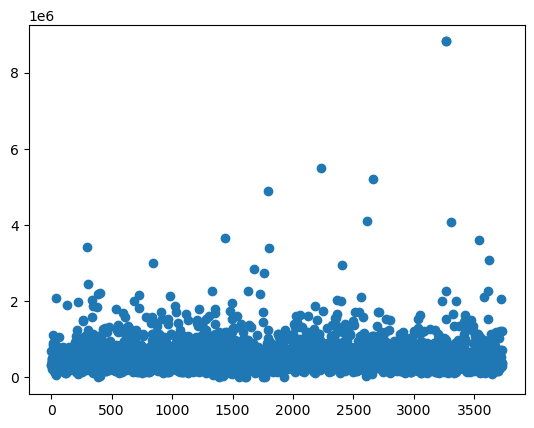

In [24]:
plt.scatter([i for i in range(len(data))], data['price'])
plt.show()

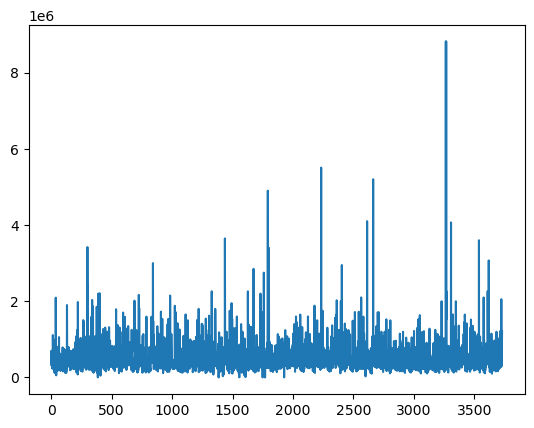

In [25]:
# line chart
plt.plot([i for i in range(len(data))], data['price'])
plt.show()

###### Handle outliers

In [26]:
from numpy import mean
from numpy import std

In [27]:
# price column

In [28]:
data_mean = mean(data['price'])
data_std = std(data['price'])

In [29]:
data_mean

534874.7367292225

In [30]:
data_std

416343.75553305366

In [31]:
cut_off = data_std*3

In [34]:
lower = data_mean-cut_off
upper = data_mean+ cut_off

In [35]:
# outliers = [x for x in data.price if x <lower or x > upper]

In [36]:
outliers = []
for i in data.price:
    if i < lower or i > upper:
        outliers.append(i)
        

In [37]:
outliers

[2093040,
 1900000,
 1980000,
 3420000,
 2450000,
 2034000,
 1865000,
 1855000,
 2200000,
 2210000,
 1790000,
 2015000,
 2165888,
 1820000,
 3000000,
 2150000,
 1880000,
 1800000,
 2260000,
 1800000,
 3648000,
 1950000,
 2260000,
 2850000,
 2200000,
 2750000,
 4900000,
 3400000,
 1884100,
 5505000,
 2025000,
 2000000,
 2950000,
 2100000,
 4100000,
 5200000,
 2000000,
 8814000,
 8814000,
 2260000,
 4068000,
 2000000,
 3600000,
 2100000,
 2260000,
 3070000,
 2052000]

In [38]:
print("Total outliers: ", len(outliers))

Total outliers:  47


In [39]:
#  visualizing the outliers

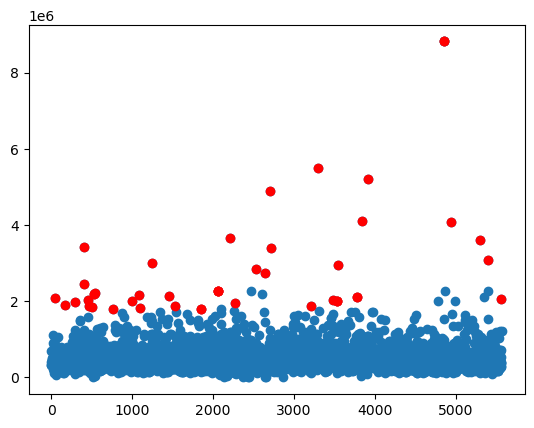

In [42]:
plt.scatter(data.price.index, data.price)

for i in data.price:
    if i in outliers:
        plt.scatter(data.price[data.price==i].index[0], i, c='r')
plt.show()

In [43]:
# filter the dataset
data.drop(data.price[data.price < lower].index, inplace=True)

In [44]:
data.drop(data.price[data.price >upper].index, inplace=True)

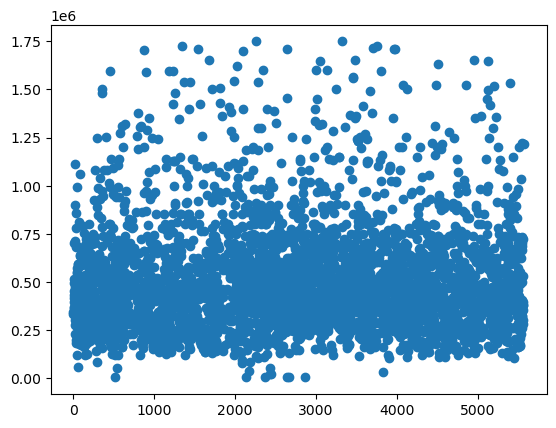

In [45]:
plt.scatter(data.price.index, data.price)
